In [1]:
import pandas as pd
from openai import OpenAI
from tqdm import tqdm
import json

# === 初始化本地 llama.cpp 接口 ===
client = OpenAI(base_url="http://localhost:8000/v1", api_key="cltl")  # 替换为你自己的地址和key（if needed）

# === 加载待评估数据 ===
df = pd.read_csv("1merged_matched_context.csv")
eval_df = df[["dialogue_id", "question_index", "context", "model1"]].copy()
eval_df = eval_df.rename(columns={"model1": "question"})
eval_df["question"] = eval_df["question"].str.replace(r"^C:\s*", "", regex=True).str.strip()

# === 定义评估函数 ===
def build_prompt(context, question):
    return f"""
You are a medical dialogue evaluator. Your task is to rate the quality of a follow-up question proposed by a doctor, based on the preceding conversation with a patient.

You will evaluate the question on two criteria:

1. **Relevance (1-5):** Is the question logically and topically related to the context? Does it follow naturally from what the patient or doctor previously said?
2. **Faithfulness (1-5):** Is the question grounded in the context, avoiding hallucinated or unrelated information?

---

Please follow these steps before rating:

1. Read the context carefully and identify the main points discussed.
2. Read the follow-up question and consider how well it connects to the context.
3. For relevance: Does the question continue the conversation in a coherent and contextually appropriate way?
4. For faithfulness: Is all the information in the question justifiable based on the previous context?
5. Then assign a score for each dimension from 1 (poor) to 5 (excellent).
6. Provide a short explanation for your ratings.

---

Context:
{context}

Follow-up Question:
{question}

Respond **only** in the following JSON format (no explanations outside JSON):

{{
  "relevance": <1-5 integer>,
  "faithfulness": <1-5 integer>,
  "comments": "<short explanation for your ratings>"
}}
"""

def evaluate_row(context, question):
    prompt = build_prompt(context, question)

    try:
        response = client.chat.completions.create(
            model="llama3",  # 修改为你的模型名称
            messages=[
                {"role": "system", "content": "You are a helpful assistant that evaluates medical dialogue."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.2,
            max_tokens=512
        )
        output = response.choices[0].message.content.strip()

        # 确保是有效 JSON
        if output.startswith("```json"):
            output = output.replace("```json", "").replace("```", "").strip()
        return json.loads(output)

    except Exception as e:
        return {
            "relevance": None,
            "faithfulness": None,
            "comments": f"Error: {str(e)}"
        }

# === 批量评估 ===
results = []
for _, row in tqdm(eval_df.iterrows(), total=len(eval_df)):
    res = evaluate_row(row["context"], row["question"])
    results.append(res)

# === 合并并保存结果 ===
results_df = pd.DataFrame(results)
final_df = pd.concat([eval_df, results_df], axis=1)
final_df.to_csv("model1_eval_g_eval_output.csv", index=False)
print("✅ 评估完成，结果已保存为 model1_eval_g_eval_output.csv")


100%|███████████████████████████████████████| 331/331 [4:21:31<00:00, 47.41s/it]

✅ 评估完成，结果已保存为 model1_eval_g_eval_output.csv


In [9]:
import pandas as pd
from openai import OpenAI
from tqdm import tqdm
import json

# === 初始化本地 llama.cpp 接口 ===
client = OpenAI(base_url="http://localhost:8000/v1", api_key="cltl")  # 替换为你自己的地址和key（if needed）

# === 加载待评估数据 ===
df = pd.read_csv("1merged_matched_context.csv")
eval_df = df[["dialogue_id", "question_index", "context", "model2"]].copy()
eval_df = eval_df.rename(columns={"model2": "question"})
eval_df["question"] = eval_df["question"].str.replace(r"^C:\s*", "", regex=True).str.strip()

# === 定义评估函数 ===
def build_prompt(context, question):
    return f"""
You are a medical dialogue evaluator. Your task is to rate the quality of a follow-up question proposed by a doctor, based on the preceding conversation with a patient.

You will evaluate the question on two criteria:

1. **Relevance (1-5):** Is the question logically and topically related to the context? Does it follow naturally from what the patient or doctor previously said?
2. **Faithfulness (1-5):** Is the question grounded in the context, avoiding hallucinated or unrelated information?

---

Please follow these steps before rating:

1. Read the context carefully and identify the main points discussed.
2. Read the follow-up question and consider how well it connects to the context.
3. For relevance: Does the question continue the conversation in a coherent and contextually appropriate way?
4. For faithfulness: Is all the information in the question justifiable based on the previous context?
5. Then assign a score for each dimension from 1 (poor) to 5 (excellent).
6. Provide a short explanation for your ratings.

---

Context:
{context}

Follow-up Question:
{question}

Respond **only** in the following JSON format (no explanations outside JSON):

{{
  "relevance": <1-5 integer>,
  "faithfulness": <1-5 integer>,
  "comments": "<short explanation for your ratings>"
}}
"""

def evaluate_row(context, question):
    prompt = build_prompt(context, question)

    try:
        response = client.chat.completions.create(
            model="llama3",  # 修改为你的模型名称
            messages=[
                {"role": "system", "content": "You are a helpful assistant that evaluates medical dialogue."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.2,
            max_tokens=512
        )
        output = response.choices[0].message.content.strip()

        # 确保是有效 JSON
        if output.startswith("```json"):
            output = output.replace("```json", "").replace("```", "").strip()
        return json.loads(output)

    except Exception as e:
        return {
            "relevance": None,
            "faithfulness": None,
            "comments": f"Error: {str(e)}"
        }

# === 批量评估 ===
results = []
for _, row in tqdm(eval_df.iterrows(), total=len(eval_df)):
    res = evaluate_row(row["context"], row["question"])
    results.append(res)

# === 合并并保存结果 ===
results_df = pd.DataFrame(results)
final_df = pd.concat([eval_df, results_df], axis=1)
final_df.to_csv("model2_eval_g_eval_output.csv", index=False)
print("✅ 评估完成，结果已保存为 model2_eval_g_eval_output.csv")


100%|███████████████████████████████████████| 331/331 [4:41:32<00:00, 51.04s/it]

✅ 评估完成，结果已保存为 model2_eval_g_eval_output.csv


In [10]:
import pandas as pd
from openai import OpenAI
from tqdm import tqdm
import json

# === 初始化本地 llama.cpp 接口 ===
client = OpenAI(base_url="http://localhost:8000/v1", api_key="cltl")  # 替换为你自己的地址和key（if needed）

# === 加载待评估数据 ===
df = pd.read_csv("1merged_matched_context.csv")
eval_df = df[["dialogue_id", "question_index", "context", "model3"]].copy()
eval_df = eval_df.rename(columns={"model3": "question"})
eval_df["question"] = eval_df["question"].str.replace(r"^C:\s*", "", regex=True).str.strip()

# === 定义评估函数 ===
def build_prompt(context, question):
    return f"""
You are a medical dialogue evaluator. Your task is to rate the quality of a follow-up question proposed by a doctor, based on the preceding conversation with a patient.

You will evaluate the question on two criteria:

1. **Relevance (1-5):** Is the question logically and topically related to the context? Does it follow naturally from what the patient or doctor previously said?
2. **Faithfulness (1-5):** Is the question grounded in the context, avoiding hallucinated or unrelated information?

---

Please follow these steps before rating:

1. Read the context carefully and identify the main points discussed.
2. Read the follow-up question and consider how well it connects to the context.
3. For relevance: Does the question continue the conversation in a coherent and contextually appropriate way?
4. For faithfulness: Is all the information in the question justifiable based on the previous context?
5. Then assign a score for each dimension from 1 (poor) to 5 (excellent).
6. Provide a short explanation for your ratings.

---

Context:
{context}

Follow-up Question:
{question}

Respond **only** in the following JSON format (no explanations outside JSON):

{{
  "relevance": <1-5 integer>,
  "faithfulness": <1-5 integer>,
  "comments": "<short explanation for your ratings>"
}}
"""

def evaluate_row(context, question):
    prompt = build_prompt(context, question)

    try:
        response = client.chat.completions.create(
            model="llama3",  # 修改为你的模型名称
            messages=[
                {"role": "system", "content": "You are a helpful assistant that evaluates medical dialogue."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.2,
            max_tokens=512
        )
        output = response.choices[0].message.content.strip()

        # 确保是有效 JSON
        if output.startswith("```json"):
            output = output.replace("```json", "").replace("```", "").strip()
        return json.loads(output)

    except Exception as e:
        return {
            "relevance": None,
            "faithfulness": None,
            "comments": f"Error: {str(e)}"
        }

# === 批量评估 ===
results = []
for _, row in tqdm(eval_df.iterrows(), total=len(eval_df)):
    res = evaluate_row(row["context"], row["question"])
    results.append(res)

# === 合并并保存结果 ===
results_df = pd.DataFrame(results)
final_df = pd.concat([eval_df, results_df], axis=1)
final_df.to_csv("model3_eval_g_eval_output.csv", index=False)
print("✅ 评估完成，结果已保存为 model3_eval_g_eval_output.csv")


100%|███████████████████████████████████████| 331/331 [2:42:32<00:00, 29.47s/it]

✅ 评估完成，结果已保存为 model3_eval_g_eval_output.csv


In [13]:
import pandas as pd
from openai import OpenAI
from tqdm import tqdm
import json

# === 初始化本地 llama.cpp 接口 ===
client = OpenAI(base_url="http://localhost:8000/v1", api_key="cltl")  # 替换为你自己的地址和key（if needed）

# === 加载待评估数据 ===
df = pd.read_csv("1merged_matched_context.csv")
eval_df = df[["dialogue_id", "question_index", "context", "model4"]].copy()
eval_df = eval_df.rename(columns={"model4": "question"})
eval_df["question"] = eval_df["question"].str.replace(r"^C:\s*", "", regex=True).str.strip()

# === 定义评估函数 ===
def build_prompt(context, question):
    return f"""
You are a medical dialogue evaluator. Your task is to rate the quality of a follow-up question proposed by a doctor, based on the preceding conversation with a patient.

You will evaluate the question on two criteria:

1. **Relevance (1-5):** Is the question logically and topically related to the context? Does it follow naturally from what the patient or doctor previously said?
2. **Faithfulness (1-5):** Is the question grounded in the context, avoiding hallucinated or unrelated information?

---

Please follow these steps before rating:

1. Read the context carefully and identify the main points discussed.
2. Read the follow-up question and consider how well it connects to the context.
3. For relevance: Does the question continue the conversation in a coherent and contextually appropriate way?
4. For faithfulness: Is all the information in the question justifiable based on the previous context?
5. Then assign a score for each dimension from 1 (poor) to 5 (excellent).
6. Provide a short explanation for your ratings.

---

Context:
{context}

Follow-up Question:
{question}

Respond **only** in the following JSON format (no explanations outside JSON):

{{
  "relevance": <1-5 integer>,
  "faithfulness": <1-5 integer>,
  "comments": "<short explanation for your ratings>"
}}
"""

def evaluate_row(context, question):
    prompt = build_prompt(context, question)

    try:
        response = client.chat.completions.create(
            model="llama3",  # 修改为你的模型名称
            messages=[
                {"role": "system", "content": "You are a helpful assistant that evaluates medical dialogue."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.2,
            max_tokens=512
        )
        output = response.choices[0].message.content.strip()

        # 确保是有效 JSON
        if output.startswith("```json"):
            output = output.replace("```json", "").replace("```", "").strip()
        return json.loads(output)

    except Exception as e:
        return {
            "relevance": None,
            "faithfulness": None,
            "comments": f"Error: {str(e)}"
        }

# === 批量评估 ===
results = []
for _, row in tqdm(eval_df.iterrows(), total=len(eval_df)):
    res = evaluate_row(row["context"], row["question"])
    results.append(res)

# === 合并并保存结果 ===
results_df = pd.DataFrame(results)
final_df = pd.concat([eval_df, results_df], axis=1)
final_df.to_csv("model4_eval_g_eval_output.csv", index=False)
print("✅ 评估完成，结果已保存为 model4_eval_g_eval_output.csv")


100%|███████████████████████████████████████| 331/331 [1:14:58<00:00, 13.59s/it]

✅ 评估完成，结果已保存为 model4_eval_g_eval_output.csv


In [4]:
import pandas as pd
from openai import OpenAI
from tqdm import tqdm
import json

# === 初始化本地 llama.cpp 接口 ===
client = OpenAI(base_url="http://localhost:8000/v1", api_key="cltl")  # 替换为你自己的地址和key（if needed）

# === 加载待评估数据 ===
df = pd.read_csv("1merged_matched_context.csv")
eval_df = df[["dialogue_id", "question_index", "context", "model5"]].copy()
eval_df = eval_df.rename(columns={"model5": "question"})
eval_df["question"] = eval_df["question"].str.replace(r"^C:\s*", "", regex=True).str.strip()

# === 定义评估函数 ===
def build_prompt(context, question):
    return f"""
You are a medical dialogue evaluator. Your task is to rate the quality of a follow-up question proposed by a doctor, based on the preceding conversation with a patient.

You will evaluate the question on two criteria:

1. **Relevance (1-5):** Is the question logically and topically related to the context? Does it follow naturally from what the patient or doctor previously said?
2. **Faithfulness (1-5):** Is the question grounded in the context, avoiding hallucinated or unrelated information?

---

Please follow these steps before rating:

1. Read the context carefully and identify the main points discussed.
2. Read the follow-up question and consider how well it connects to the context.
3. For relevance: Does the question continue the conversation in a coherent and contextually appropriate way?
4. For faithfulness: Is all the information in the question justifiable based on the previous context?
5. Then assign a score for each dimension from 1 (poor) to 5 (excellent).
6. Provide a short explanation for your ratings.

---

Context:
{context}

Follow-up Question:
{question}

Respond **only** in the following JSON format (no explanations outside JSON):

{{
  "relevance": <1-5 integer>,
  "faithfulness": <1-5 integer>,
  "comments": "<short explanation for your ratings>"
}}
"""

def evaluate_row(context, question):
    prompt = build_prompt(context, question)

    try:
        response = client.chat.completions.create(
            model="llama3",  # 修改为你的模型名称
            messages=[
                {"role": "system", "content": "You are a helpful assistant that evaluates medical dialogue."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.2,
            max_tokens=512
        )
        output = response.choices[0].message.content.strip()

        # 确保是有效 JSON
        if output.startswith("```json"):
            output = output.replace("```json", "").replace("```", "").strip()
        return json.loads(output)

    except Exception as e:
        return {
            "relevance": None,
            "faithfulness": None,
            "comments": f"Error: {str(e)}"
        }

# === 批量评估 ===
results = []
for _, row in tqdm(eval_df.iterrows(), total=len(eval_df)):
    res = evaluate_row(row["context"], row["question"])
    results.append(res)

# === 合并并保存结果 ===
results_df = pd.DataFrame(results)
final_df = pd.concat([eval_df, results_df], axis=1)
final_df.to_csv("model5_eval_g_eval_output.csv", index=False)
print("✅ 评估完成，结果已保存为 model5_eval_g_eval_output.csv")


100%|███████████████████████████████████████| 331/331 [3:47:35<00:00, 41.26s/it]

✅ 评估完成，结果已保存为 model5_eval_g_eval_output.csv


📊 各模型平均得分：


,relevance,faithfulness
model,,
model1,4.967,4.937
model2,4.943,4.906
model3,4.770,4.903
model4,4.740,4.852
model5,4.420,4.695


/var/folders/7p/lz8173z10t11n1drpgqzj1b40000gn/T/ipykernel_22003/1752623720.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x="model", y="relevance", palette="pastel")
/var/folders/7p/lz8173z10t11n1drpgqzj1b40000gn/T/ipykernel_22003/1752623720.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x="model", y="faithfulness", palette="pastel")


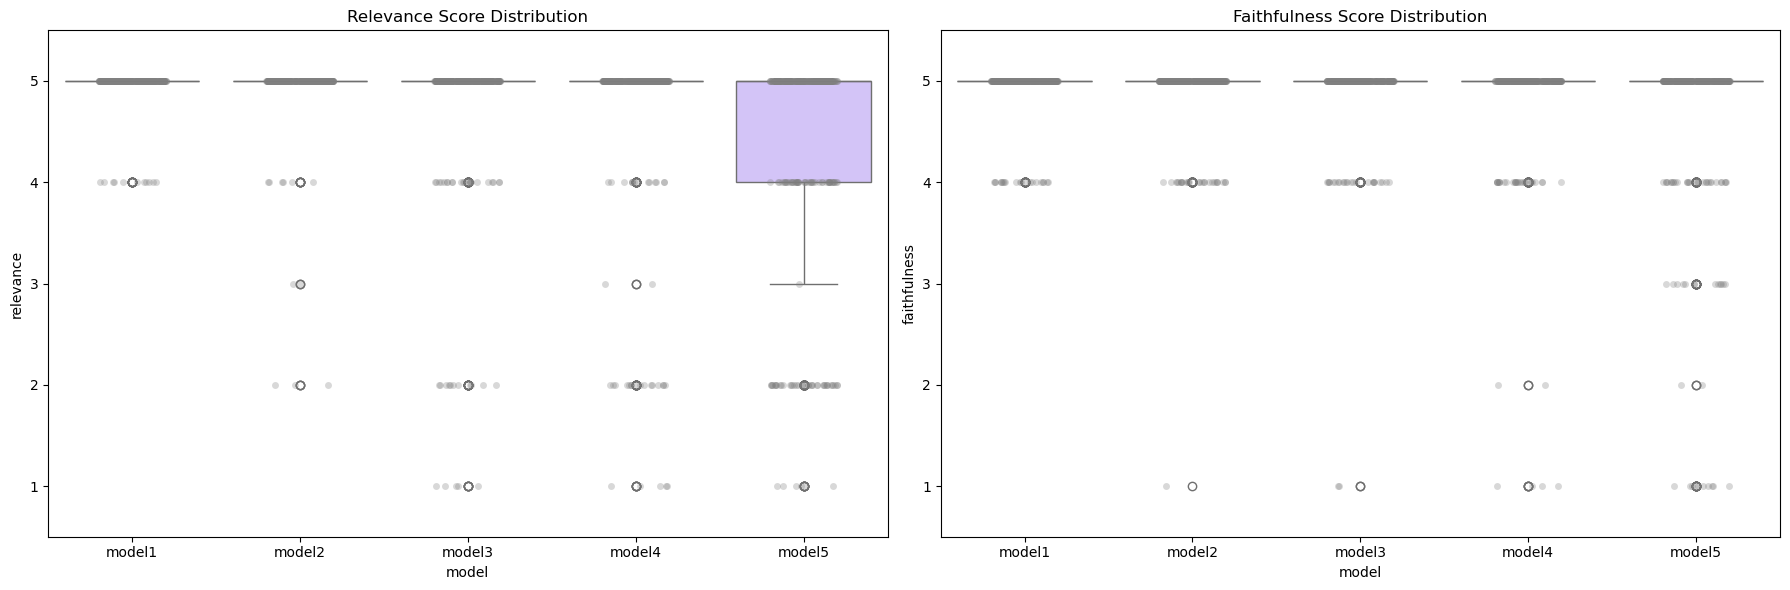


🔎 最低 relevance 样本（前5条）


,model,dialogue_id,question_index,question,context,relevance,comments
741,model3,66,7,that’s great.,C: hi Mrs. T how are you doing today? P: I’m d...,1,The question 'that's great' is not a follow-up...
822,model3,67,4,NaN,"C: Hey my name is Marco, I’m here to see your ...",1,"The follow-up question is missing, so it's imp..."
1317,model4,76,0,"I’m doing well too. It’s a lovely day outside,...","C: Good morning Joshua, how are you doing toda...",1,The question is not logically related to the c...
1541,model5,58,8,That is very nice to hear.,C: Good evening. I am Darla. What is your name...,1,The question is a polite response to the patie...
1141,model4,10,0,"I’m doing well, thanks to my family and friend...",C: Good afternoon. How are you doing today? P:...,1,The question is not directly related to the pa...



🔎 最低 faithfulness 样本（前5条）


,model,dialogue_id,question_index,question,context,faithfulness,comments
1518,model5,71,0,If I’m not mistaken you just got back from a s...,"C: Good morning Joshua, how are you today? P: ...",1,The question is not directly related to the co...
818,model3,67,0,"Nice to meet you, Mrs. Samantha. How old are you?","C: Hey my name is Marco, I’m here to see your ...",1,The question is not directly related to the co...
1547,model5,59,5,Would you say it is also for your head?,"C: Good morning, how are you? P: I am good. Ju...",1,The question is not directly related to the pr...
1523,model5,71,6,That’s excellent. Looking back to when you fel...,"C: Good morning Joshua, how are you today? P: ...",1,The question is not directly related to the co...
1507,model5,70,0,"Likewise, Diego. How is life.","C: Hey there, welcome! I’m Hazel, your physiot...",1,The question is not logically related to the c...


In [17]:
# === 1. 导入库 ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 2. 加载5个模型的 G-Eval 结果文件 ===
df_model1 = pd.read_csv("model1_eval_g_eval_output.csv")
df_model2 = pd.read_csv("model2_eval_g_eval_output.csv")  # 👈 NEW
df_model3 = pd.read_csv("model3_eval_g_eval_output.csv")
df_model4 = pd.read_csv("model4_eval_g_eval_output.csv")
df_model5 = pd.read_csv("model5_eval_g_eval_output.csv")

# === 3. 添加模型标签并合并数据 ===
df_model1["model"] = "model1"
df_model2["model"] = "model2"
df_model3["model"] = "model3"
df_model4["model"] = "model4"
df_model5["model"] = "model5"

combined_df = pd.concat(
    [df_model1, df_model2, df_model3, df_model4, df_model5],
    ignore_index=True
)

# === 4. 输出平均得分表格 ===
summary_stats = combined_df.groupby("model")[["relevance", "faithfulness"]].mean().round(3)
print("📊 各模型平均得分：")
display(summary_stats)

# === 5. 可视化分布图 ===
plt.figure(figsize=(18, 6))

# Relevance 分布
plt.subplot(1, 2, 1)
sns.boxplot(data=combined_df, x="model", y="relevance", palette="pastel")
sns.stripplot(data=combined_df, x="model", y="relevance", color="gray", alpha=0.3, jitter=0.2)
plt.title("Relevance Score Distribution")
plt.ylim(0.5, 5.5)

# Faithfulness 分布
plt.subplot(1, 2, 2)
sns.boxplot(data=combined_df, x="model", y="faithfulness", palette="pastel")
sns.stripplot(data=combined_df, x="model", y="faithfulness", color="gray", alpha=0.3, jitter=0.2)
plt.title("Faithfulness Score Distribution")
plt.ylim(0.5, 5.5)

plt.tight_layout()
plt.show()

# === 6. 输出低分样本（每个维度前5条） ===
for metric in ["relevance", "faithfulness"]:
    print(f"\n🔎 最低 {metric} 样本（前5条）")
    worst_samples = combined_df.sort_values(by=metric).head(5)
    display(worst_samples[[
        "model", "dialogue_id", "question_index",
        "question", "context", metric, "comments"
    ]])